In [192]:
#LOGISTIC REGRESSION

In [193]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [194]:
df=pd.read_csv("diabetes (1).csv")

In [195]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [197]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [198]:
### Check missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [199]:
### checking the duplicates
df.duplicated().sum()

np.int64(0)

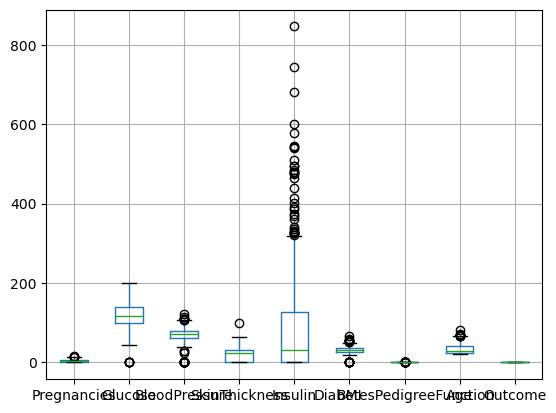

In [200]:
df.boxplot()
plt.show()

In [201]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

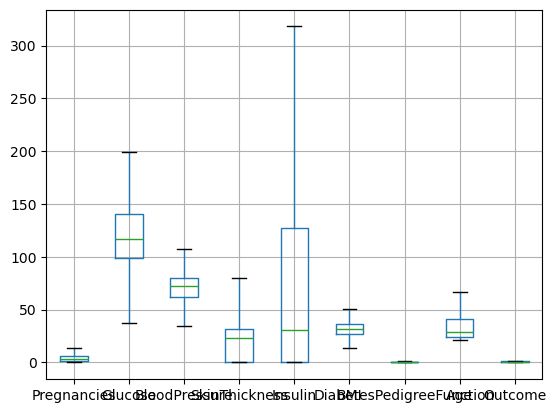

In [202]:
df.boxplot()
plt.show()

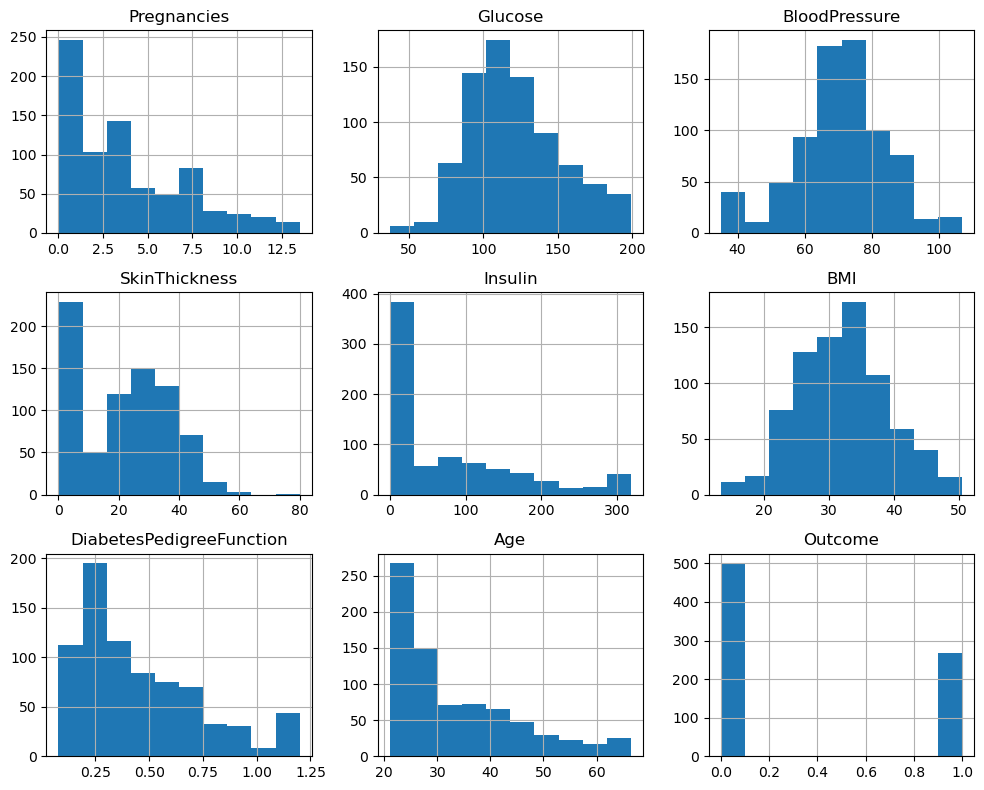

In [203]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [204]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


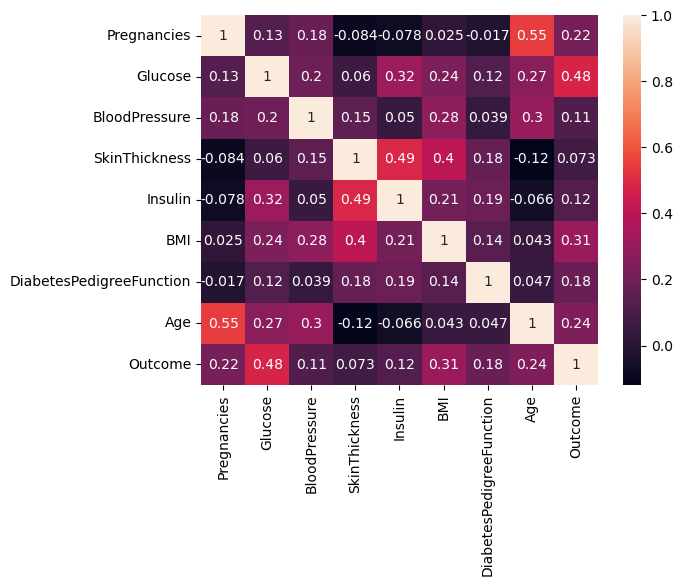

In [205]:
#heatmap
plt.figure
sns.heatmap(corr,annot=True)
plt.show()

In [206]:
target=df[['Outcome']]
features=df.drop(columns=['Outcome'])

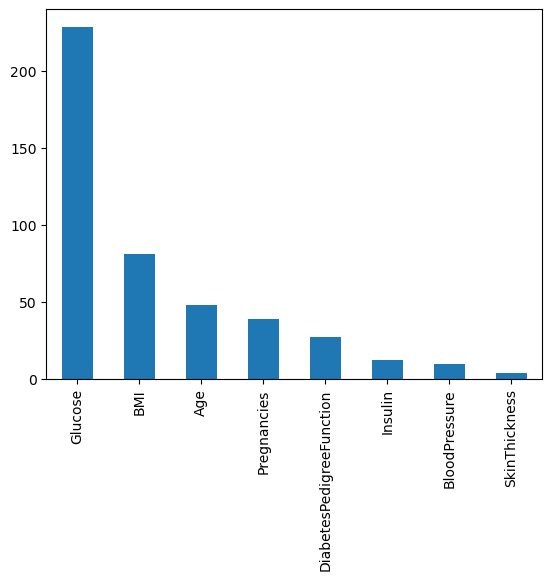

In [207]:
from sklearn.feature_selection import f_classif
f_classification=f_classif(features,target)
pd.Series(f_classification[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()


In [208]:
features.drop(columns=['SkinThickness'],inplace=True)

In [209]:
features.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,168.0,43.1,1.200,33.0


In [210]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 7)
(192, 7)
(576, 1)
(192, 1)


In [211]:
std_sca=StandardScaler()
x_train[['Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]= std_sca.fit_transform(x_train[['Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']])
x_test[['Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]= std_sca.transform(x_test[['Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']])

In [212]:
#Model Building:

In [213]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [214]:
log_model.coef_

array([[ 0.10537044,  1.23674505, -0.1630755 , -0.15531729,  0.751818  ,
         0.46609742,  0.25357417]])

In [215]:
log_model.intercept_

array([-1.30133669])

In [216]:
### sigmoid values
sigmoid= log_model.predict_proba(x_test)[:,1]
sigmoid

array([0.20415197, 0.06414748, 0.7515231 , 0.10506782, 0.45770994,
       0.76363244, 0.97158828, 0.13289152, 0.9237216 , 0.22790656,
       0.08129893, 0.90908514, 0.62253051, 0.33192011, 0.76574625,
       0.30811328, 0.07384994, 0.24996472, 0.57061726, 0.1300645 ,
       0.20838817, 0.00992782, 0.54953431, 0.98462136, 0.2386787 ,
       0.85355437, 0.49462512, 0.33173269, 0.42469659, 0.62047316,
       0.04004886, 0.96947131, 0.16923543, 0.56318917, 0.22547943,
       0.33000145, 0.93742139, 0.02552025, 0.18940757, 0.27781776,
       0.3555788 , 0.85244297, 0.44017546, 0.07995656, 0.25399785,
       0.93978822, 0.07909739, 0.20471829, 0.9089891 , 0.89769439,
       0.08935155, 0.03695601, 0.33450156, 0.80983187, 0.77174701,
       0.91423347, 0.09901829, 0.06040947, 0.85468142, 0.09419708,
       0.16481588, 0.15837255, 0.29770791, 0.35195466, 0.40024256,
       0.26289504, 0.1705581 , 0.02204358, 0.21629083, 0.02341711,
       0.01500754, 0.70825973, 0.09164657, 0.25604401, 0.16575

In [217]:
y_pred= log_model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [218]:
accuracy_score(y_test,y_pred)

0.7395833333333334

In [219]:
### cost function
log_loss(y_test,sigmoid)

0.5503806328198244

In [220]:
#accuracy, precision, recall, F1-score, and ROC-AUC score

In [221]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

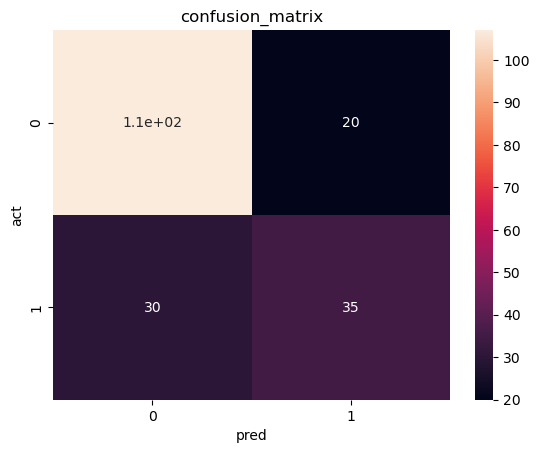

In [222]:
conf= confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True)
plt.xlabel('pred')
plt.ylabel('act')
plt.title('confusion_matrix')
plt.show();

In [223]:
y_test.value_counts()

Outcome
0          127
1           65
Name: count, dtype: int64

In [224]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       127
           1       0.64      0.54      0.58        65

    accuracy                           0.74       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.73      0.74      0.73       192



In [225]:
from sklearn.metrics import roc_auc_score,roc_curve

In [226]:
auc_score=roc_auc_score(y_test,sigmoid)
auc_score

0.7836462749848577

In [227]:
#roc curve

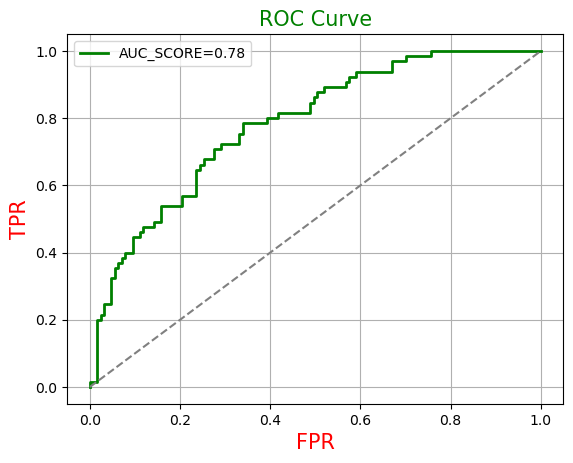

In [228]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)
plt.plot(fpr,tpr,color='green',linewidth=2,label=f'AUC_SCORE={auc_score:.2f}')
plt.plot([0,1],linestyle='--',color='grey')
plt.xlabel('FPR',size=15,color='red')
plt.ylabel('TPR',size=15,color='red')
plt.title('ROC Curve',color='green',size=15)
plt.legend()
plt.grid()
plt.show()

Interpretation:
Each coefficient shows the effect of the predictor on the log-odds of having diabetes
Most significant predictors are Glucose,BMI, Pregnancies, DiabetesPedigreeFunction.
Moderately significant:BloodPressure, Insulin, Age.
Not significant:SkinThickness.

In [229]:
#Model Deployment With Streamlit:

In [230]:
import pickle

In [231]:
file='logi.pkl'

In [232]:
pickle.dump(log_model,open(file,'wb'))
